In [1]:
import numpy as np
from pylab import imshow, show
from timeit import default_timer as timer
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
from numba import autojit

@autojit
def mandel(x, y, max_iters):
  """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
  """
  c = complex(x, y)
  z = 0.0j
  for i in range(max_iters):
    z = z*z + c
    if (z.real*z.imag + z.imag*z.real) >= 3:
      return i

  return max_iters

@autojit
def create_fractal(min_x, max_x, min_y, max_y, image, iters):
  height = image.shape[0]
  width = image.shape[1]

  pixel_size_x = (max_x - min_x) / width
  pixel_size_y = (max_y - min_y) / height
    
  for x in range(width):
    real = min_x + x * pixel_size_x
    for y in range(height):
      imag = min_y + y * pixel_size_y
      color = mandel(real, imag, iters)
      image[y, x] = color


Mandelbrot created in 0.356785 s


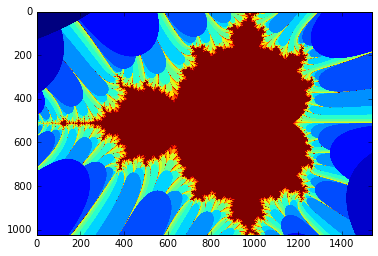

In [12]:
image = np.zeros((1024, 1536), dtype = np.uint8)
start = timer()
create_fractal(-2.0, 1.0, -1.0, 1.0, image, 15) 
dt_cpu = timer() - start

print("Mandelbrot created in %f s" % dt_cpu)
imshow(image)
show()